# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

**Important:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an overview of Dandiset 001333, the Parkinson's Electrophysiological Signal Dataset (PESD). We will explore the data and visualize some key aspects.

You can find the Dandiset on Neurosift here: https://neurosift.app/dandiset/001333

## Notebook Overview

This notebook will cover the following:

1.  Loading the Dandiset using the DANDI API.
2.  Loading an NWB file from the Dandiset and displaying its metadata.
3.  Visualizing data from the NWB file, including Beta Band Voltage.
4.  Creating a dummy plot for demonstration purposes.

## Required Packages

The following packages are required to run this notebook. Please ensure they are installed in your environment.

-   pynwb
-   h5py
-   remfile
-   matplotlib
-   numpy

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 52 assets in the dataset

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb


## Loading an NWB File and Displaying Metadata

In this section, we will load one of the NWB files from the Dandiset and display some of its metadata. We will load the file:
`sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-1044_ecephys.nwb`

The URL for this asset is: https://api.dandiarchive.org/api/assets/1d94c7ad-dbaf-43ea-89f2-1b2518fab158/download/

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/1d94c7ad-dbaf-43ea-89f2-1b2518fab158/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

print(nwb)
print(nwb.session_description)
print(nwb.identifier)
print(nwb.session_start_time)

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


root pynwb.file.NWBFile at 0x140076964832208
Fields:
  devices: {
    NEURON_Simulator <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    shank0 <class 'pynwb.ecephys.ElectrodeGroup'>,
    shank1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    shank2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    shank3 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: The PESD dataset is generated from a cortico-basal-ganglia network for a Parkinsonian computational model. The computational model of the cortico-basal-ganglia is originally presented by Fleming et al. in the article: 'Simulation of Closed-Loop Deep Brain Stimulation Control Schemes for Suppression of Pathological Beta Oscillations in Parkinson's Disease'.
  experimenter: ['Ananna Biswas']
  file_create_date: [datetime.datetime(2025, 4, 3, 12, 30, 26, 128020, tzinfo=tzoffset(None, -14400))]
  identifier: 84828db4-a3a3-4b2e-abff-6db2b404dd68
  instituti

## Visualizing Data from the NWB File

Now, let's visualize some data from the NWB file. We will plot the Beta Band Voltage over time.

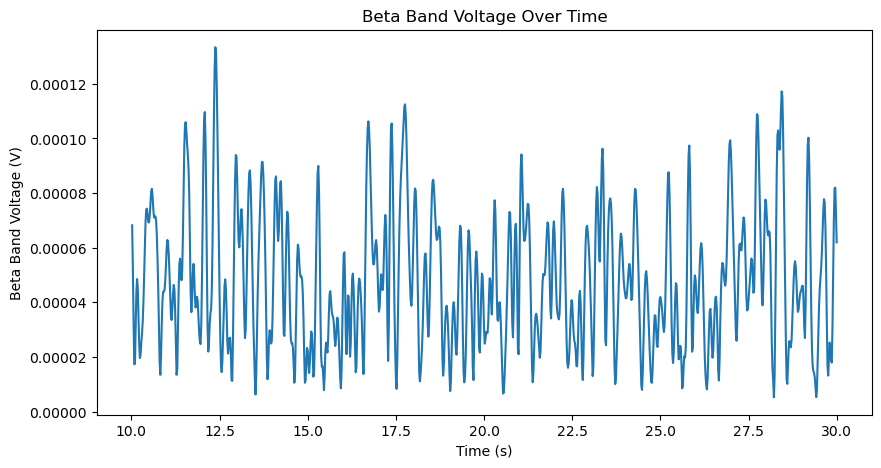

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Get the Beta_Band_Voltage data
data = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"].data
timestamps = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"].timestamps

# Get the first 1000 data points
num_points = 1000
data_subset = data[:num_points]
timestamps_subset = timestamps[:num_points]

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(timestamps_subset, data_subset)
plt.xlabel("Time (s)")
plt.ylabel("Beta Band Voltage (V)")
plt.title("Beta Band Voltage Over Time")
plt.show()

## Dummy Plot

Here is a dummy plot

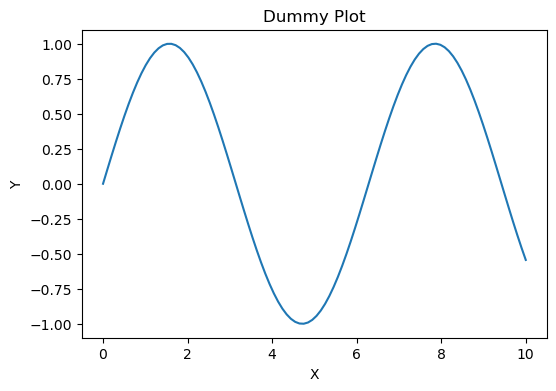

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create some dummy data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dummy Plot")
plt.show()

## Summary and Future Directions

This notebook provided a basic overview of how to load and visualize data from Dandiset 001333.

Future directions for analysis could include:

-   Exploring more NWB files in the Dandiset.
-   Performing more advanced signal processing and analysis on the electrophysiological data.
-   Investigating the relationships between different data modalities in the Dandiset.